# Probability 2 (Master Data science, University of Lille) / CMF (Centrale Lille, G3 SDIA)

---

## Lab 2 - Queues, Metropolis-Hastings and simulated annealing

---

## Guidelines (read carefully before starting)

**Objectives**: numerically simulate queues, implement an example of a Metropolis-Hasting algorithm and simulated annealing.

**Setup**: after retrieving the resources for the lab on moodle:
- place the .zip archive in a local folder (Computer -> Documents/Python/);
- unzip the archive .zip;
- rename the folder with the convention lab2_Name1_Name2
- duplicate the notebook file and rename it lab2_Name1_Name2.ipynb;
- [**optional, possibly needed if working from Centrale's machines**]
    - create a `lab2` conda environment from the provided `requirement.txt` file
    ```bash
    conda create --name=lab2 --file=requirement.txt
    conda activate lab2
    # do not forget to deactivate the environment if needed
    # you can remove the environment once you are done
    conda env remove --name=lab2
    ```
    - launch jupyter notebook (the python environment will be the one from the conda environment `lab2`)
- at the end of the session, do not forget to transfer your work to your own network space if you are working on a machine from the school (do not leave your work on the C: drive).

**Assessment** &#8594; grade /20 (possibly converted later on to a grade ranging from F to A (A+))

This lab session will be evaluated, based on your answer to the exercises reported in a Jupyter notebook (e.g., this one) and any additional `.py` file produced. In particular:

- make sure the notebook you produce is properly annotated: each exercise should be introduced by a short sentence summarizing its context. Concisely answer each question from the guideline. 
- **relate the numerical results to the theory covered during the lecture** whenever appropriate;
- **codes without any explanations (in a text cell) will not be considered as a complete answer**, and will only be attributed a fraction opf the grade attributed to the question.
- any code produced should be commented whenever appropriate;
- include appropriate axis labels and a relevant title to each figure reported in the notebook;
- **document any function you introduce (using docstrings)**, and comment your code whenever appropriate (see, *e.g.*, [PEP 8 style recommendations](https://www.python.org/dev/peps/pep-0008/)). 
     - use a reference docstring style, *e.g.*, the [google docstring style](https://sphinxcontrib-napoleon.readthedocs.io/en/latest/example_google.html).
- **give a clear structure to your notebook**: longer theoretical explanations should be reported in markdown cells. Include LaTeX equations to improve the clarity of the document.

**Additional evaluation criteria**:
- Code clarity / conciseness / documentation
- Comment quality / overall presentation

## <a name="content">Contents</a>
- [Exercise 1: Simulating $M/M/1/\infty$ and $M/M/1/K$ queues](#ex1)
- [Exercise 2: Drawing samples from the Ising model with the Metropolis-Hasings algorithm](#ex2)
- [Exercise 3: Simulated annealing for the *traveling salesman* problem](#ex3)

In [1]:
# "IPython magic command" to automatically reload any module whose
# implementation has been modified during the execution of the notebook
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt

---
## <a name="ex1">Exercise 1: Simulating $M/M/1/\infty$ and $M/M/1/K$ queues</a> [(&#8593;)](#content)

This exercise will focus on simulating an $M/M/1/\infty$ and an $M/M/1/K$ queue to illustrate some of the results covered in lecture 5. <!--in Chapter 2 and in TD.3-->

In the following, the parameter of the exponential distributions governing the inter-arrival and service times will be denoted $\beta$ (birth move) and $\delta$ (death move) respectively, with $0< \beta < \delta $. The time instants at which changes occur in the process $X(t)$ will be denoted by $T_n$ for $n \in \mathbb{N}$. We further define:

\begin{equation}
    \rho = \frac{\beta}{\delta}, \; X_n = X(T_n).
\end{equation}

### $M/M/1/\infty$-queue

1\. a) Using the lecture notes, implement a function to simulate a trajectory $X(t)$ of an $M/M/1/\infty$ process, where $X(t)$ represents the number of customers in the system at time $t$. 
<!--  from Chapter 2, Section 2.3.1 -->

> *Remark*: the signature of the function could be of the form:
``` python
def run_mm1inf(beta: float, delta: float, rng, niter: int):
    """
    Args:
        beta (float): birth rate.
        delta (float): death rate
        rng (int): random seed (or random generator).
        niter (int): number of changes (events) in 
                     the process.
    Raises:
        ValueError: error triggered if beta <= 0.
        ValueError: error triggered if delta <= 0.
    Returns:
        X (array_like): trajectory :math:`(X(t_n))`.
        T (array_like): time instants at which a change in 
                        the process occurs :math:`(t_n)`.
    """ 
```

In [10]:
def run_mm1inf(beta: float, delta: float, rng, niter: int):
    """
    Args:
        beta (float): birth rate.
        delta (float): death rate
        rng : random seed (or random generator).
        niter (int): number of changes (events) in 
                     the process.
    Raises:
        ValueError: error triggered if beta <= 0.
        ValueError: error triggered if delta <= 0.
    Returns:
        X (array_like): trajectory (X(t_n)).
        T (array_like): time instants at which a change in 
                        the process occurs (t_n).
    """ 
    if beta <= 0:
        raise ValueError("Beta must be greater than 0.")
    if delta <= 0:
        raise ValueError("Delta must be greater than 0.")
    np.random.seed(rng)
    beta=1/beta
    delta=1/delta
    T,X=np.zeros(niter),np.zeros(niter)

    for i in range(1,niter):
        if X[i-1]==0:
            T[i]=T[i-1]+np.random.exponential(beta)
            X[i]=X[i-1]+1
        else:
            Tb = np.random.exponential(beta)
            Td = np.random.exponential(delta)
            if Tb<Td : 
                T[i]=T[i-1]+Tb
                X[i]=X[i-1]+1
            else:
                T[i]=T[i-1]+Td
                X[i]=X[i-1]-1
    return X,T

b) Display the generated trajectory of the process for $(\beta,\delta) = (5, 6)$ (e.g., use only the last 100 samples of the trajectory to obtain a representative illustration).

> *Hint*: use the function `step` from the matlplotlib library.

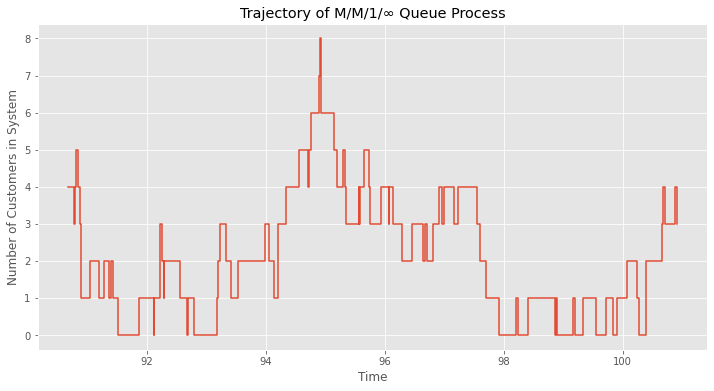

In [11]:
X, T = run_mm1inf(beta=5, delta=6, rng=42, niter=1000)

# Plotting the last 100 samples of the trajectory
plt.figure(figsize=(12, 6))
plt.step(T[-100:], X[-100:], where='post')
plt.xlabel('Time')
plt.ylabel('Number of Customers in System')
plt.title('Trajectory of M/M/1/∞ Queue Process')
plt.grid(True)
plt.show()

In [12]:
import plotly.graph_objects as go

# Creating a step plot using plotly
fig = go.Figure()
fig.add_trace(go.Scatter(x=T[-100:], y=X[-100:], mode='lines+markers', name='Number of Customers',
                         line=dict(shape='hv')))  # 'hv' creates a horizontal-vertical step plot

# Updating layout
fig.update_layout(
    title='Trajectory of M/M/1/∞ Queue Process',
    xaxis_title='Time',
    yaxis_title='Number of Customers in System',
    showlegend=False
)
fig.show()

2\. a) Display on the same graph the normalized histogram of $X(t)$ and it's stationary distribution $\pi$ defined by (see Proposition 2.1 in lecture 5)

\begin{equation}
    (\forall i \in \mathbb{N}), \; \pi(i) = (1 - \rho)\rho^i.
\end{equation}

What does this graph illustrate?

In [14]:
# Parameters
rho = beta / delta
max_state = int(max(X))  # Maximum state observed in the simulation

# Calculating the stationary distribution
pi = [(1 - rho) * (rho ** i) for i in range(max_state + 1)]

# Generating the normalized histogram
hist, bins = np.histogram(X, bins=max_state + 1, range=(0, max_state), density=True)
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# Creating a plot with Plotly
fig = go.Figure()

# Adding histogram
fig.add_trace(go.Bar(x=bin_centers, y=hist, name='Empirical Distribution (Histogram of X(t))'))

# Adding stationary distribution
fig.add_trace(go.Scatter(x=list(range(max_state + 1)), y=pi, mode='lines+markers', 
                         name='Theoretical Stationary Distribution (pi)', line=dict(color='red')))

# Updating layout
fig.update_layout(
    title='Comparison of Empirical and Stationary Distributions for M/M/1/∞ Queue',
    xaxis_title='Number of Customers in System',
    yaxis_title='Probability',
    barmode='overlay'
)

# Display the plot
fig.show()

### Observations 
> This graph  illustrate how well the empirical distribution of the queue's state (as obtained from the simulation) matches the theoretical stationary distribution. We can see the simulation is accurate, and the histogram is well approximating the stationary distribution.

b) Empirically evaluate the average number of customers, whose value should be close close to the theoretical value $\frac{\rho}{1-\rho}$ (see Definition 2.3 p. 2 in lecture 5).

In [17]:
# Empirical average number of customers
empirical_average = np.mean(X)
empirical_value_mm1inf = np.average(X[:-1],weights=np.diff(T)) 

# Theoretical average number of customers
theoretical_average = rho / (1 - rho)

print(f"différence absolue : {round((np.abs(empirical_value_mm1inf-theoretical_average)/theoretical_average)*100,2)}%")

empirical_average, theoretical_average, empirical_value_mm1inf


différence absolue : 26.73%


(7.22, 5.000000000000002, 6.336483583267339)

### $M/M/1/K$

Consider the case where the size of the capacity service $K$ is finite, i.e., where the system can only accommodate up to $K$ customers. In comparison with the previous case, any new customer trying to enter the system at a time instant $t$ will be systematically rejected if $X(t) = K$.

3\. a) Propose a variant of the function developed in 1.a) to simulate a trajectory of an $M/M/1/K$ process.

In [19]:
def run_mm1k(beta: float, delta: float,K: int, rng, niter: int):
    """
    Args:
        beta (float): birth rate.
        delta (float): death rate
        K (int) : 
        rng : random seed (or random generator).
        niter (int): number of changes (events) in 
                     the process.
    Raises:
        ValueError: error triggered if beta <= 0.
        ValueError: error triggered if delta <= 0.
    Returns:
        X (array_like): trajectory (X(t_n)).
        T (array_like): time instants at which a change in 
                        the process occurs (t_n).
    """ 
    if beta <= 0:
        raise ValueError("Beta must be greater than 0.")
    if delta <= 0:
        raise ValueError("Delta must be greater than 0.")
    if K <= 0:
        raise ValueError("K must be greater than 0.")

    np.random.seed(rng)
    beta=1/beta
    delta=1/delta
    T,X=np.zeros(niter),np.zeros(niter)

    for i in range(1,niter):
        if X[i-1]==0:
            T[i]=T[i-1]+np.random.exponential(beta)
            X[i]=X[i-1]+1
        elif X[i-1] == K:
            T[i]=(T[i-1]+rng.exponential(delta))
            X[i]=(X[i-1]-1)
        else:
            Tb = np.random.exponential(beta)
            Td = np.random.exponential(delta)
            if Tb<Td : 
                T[i]=T[i-1]+Tb
                X[i]=X[i-1]+1
            else:
                T[i]=T[i-1]+Td
                X[i]=X[i-1]-1
    return X,T

b) Display the trajectory of the process for $(\beta,\delta, K) = (5, 6, 3)$.

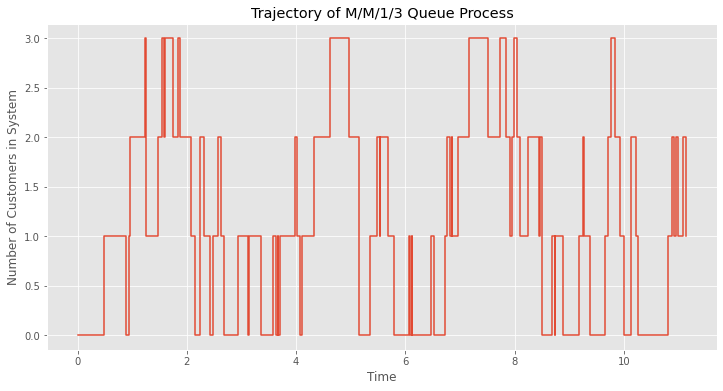

In [22]:
# Running the simulation for the M/M/1/3 queue process
beta, delta, K = 5, 6, 3
rng_seed = 42
niter = 1000

# Using the modified function to simulate the M/M/1/K process
X_K, T_K = run_mm1k(beta, delta, K, rng_seed, niter)

# Plotting the trajectory
plt.figure(figsize=(12, 6))
plt.step(T_K[:100], X_K[:100], where='post')
plt.xlabel('Time')
plt.ylabel('Number of Customers in System')
plt.title('Trajectory of M/M/1/3 Queue Process')
plt.grid(True)
plt.show()

4\. a) Display on the same graph the normalized histogram of $X(t)$ and the stationary distribution $\pi$ defined as

$$
    (\forall i \in \mathbb{N}), \; \pi(i) =
    \begin{cases}
        \frac{(1-\rho)\rho^i}{1-\rho^{K+1}} & \text{if } i \in \{0, 1, \dotsc, K \} \\
        0 & \text{otherwise.}
    \end{cases}
$$

What does this graph illustrate?

In [23]:
# Calculating the stationary distribution for M/M/1/K
pi_K = [(1 - rho) * (rho ** i) / (1 - rho ** (K + 1)) for i in range(K + 1)]

# Generating the normalized histogram for X(t) from the M/M/1/K simulation
hist_K, bins_K = np.histogram(X_K, bins=K + 1, range=(0, K), density=True)
bin_centers_K = 0.5 * (bins_K[:-1] + bins_K[1:])

# Plotting the histogram and stationary distribution using Plotly
fig = go.Figure()
fig.add_trace(go.Bar(x=bin_centers_K, y=hist_K, name='Empirical Distribution (Histogram of X(t))'))
fig.add_trace(go.Scatter(x=list(range(K + 1)), y=pi_K, mode='lines+markers', 
                         name='Theoretical Stationary Distribution (pi)', line=dict(color='red')))

# Updating layout
fig.update_layout(
    title='Comparison of Empirical and Stationary Distributions for M/M/1/3 Queue',
    xaxis_title='Number of Customers in System',
    yaxis_title='Probability',
    barmode='overlay'
)

# Display the plot
fig.show()

b) Compute the theoretical average number of customers (prove its epxression), and estimate its value using the function developed in 3.a). <!--(see TD3, exercise 3)-->

---
## <a name="ex2">Exercise 2: Drawing samples from the Ising model with the Metropolis-Hastings algorithm</a> [(&#8593;)](#content)

Consider the 2D Ising model covered in Chapter 3, section 3 of the lecture notes, taken over an $N \times N$ grid for $N = 32$, with $\beta = 0.6$. <!-- Chapter 3, p.36 -->

1\. Implement a Metropolis-Hastings algorithm to draw samples from the 2D Ising model in the above configuration. Progressively display the evolution of the image as the algorithm evolves. Generate 10000 such variables, starting from a random configuration. Qualitatively comment the content of the last few generated samples, in comparison with the initial state.

> *Note*: a) the matlpotlib examples given [here](http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-as-interactive-javascript-widgets/) can be useful
>
> b) given the relatively slow evolution from one iteration to another, you may display the current state of the image only once every 20 iterations.

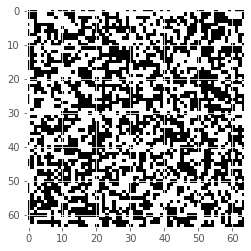

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

def metro_hasting_ising_2D(N,beta,num_samples,display_iter):
    """
    Args:
        N (int) : grid dimension grille (N x N)
        beta (float) : inverse temperature 
        num_samples (int) : number of iterations on the grid
        display_iter (int) : number of steps before refreshing grid display
    Raises:
        ValueError: error triggered if display_iter <= 0.
        ValueError: error triggered if num_samples <= 0.
        ValueError: error triggered if N <= 0.
    
    """
    assert N>0, print(f"N should be positive, N={N}")
    assert display_iter>0, print(f"display_iter should be positive, display_iter={display_iter}")
    assert num_samples>0, print(f"num_samples should be positive, num_samples={num_samples}")

    grid = 2*np.random.randint(2, size=(N,N))-1
    for i in range(num_samples):
        x = np.random.randint(N)
        y = np.random.randint(N)
        delta_E = 2 * grid[x,y] * (grid[(x+1)%N,y] + grid[(x-1)%N,y] + grid[x,(y+1)%N] + grid[x,(y-1)%N])
        if np.random.rand() < np.exp(-beta * delta_E):
            grid[x,y] = -grid[x,y]

        if i % display_iter == 0:
            clear_output(wait=True)
            plt.imshow(grid, cmap="gray", vmin=-1, vmax=1)
            plt.show()
        
#paramètres
N = 64
beta = 0.1
num_samples = 100000
display_iter=1000
metro_hasting_ising_2D(N,beta,num_samples,display_iter)

2\. Decrease the value of the parameter $\beta = 0.1$, and generate 10000 new variables with the algorithm implemented in 1. What is the influence of the parameter $\beta$?

In [ ]:
beta2 = 0.6

metro_hasting_ising_2D(N,beta2,num_samples,display_iter)

---
## <a name="ex3">Exercise 3: Simulated annealing for the *traveling salesman* problem</a> [(&#8593;)](#content)

This exercise will be focused on the implementation of a basic simulated annealing algorithm to minimize a function $f : E \subset \mathbb{N} \rightarrow \mathbb{R}$, where $E$ is finite. An application to the *traveling salesman* problem will then be considered to test the algorithm implementation. 

In general, a simulated annealing algorithm can be described as follows.

---
**Simulated annealing**

Set $x_0 \in E$, $T_0  > 0$. 

$n \leftarrow 0$

While $(n \leq N)$ and $(T_n > T_{\min})$

  1. Draw a point $y \sim Q(x_n, \cdot)$ in the neighborhood of $x_n$, and $u \sim \mathscr{U}([0,1])$ (where $\mathscr{U}$ is the uniform distribution)
  
  2. Compute the acceptance probability: 
  
$$
    p(f(x_n), f(y), T_n) = 
    \begin{cases}
        1 & \text{if } f(y) < f(x_n) \\
        e^{-(f(y) - f(x_n))/T_n} & \text{otherwise.}
    \end{cases}
$$
  
  3. Set $x_{n+1} = \begin{cases}
       y & \text{if } u \leq p(f(x_n), f(y), T_n) \\
       x_n & \text{otherwise.}
       \end{cases}$
  4. Set $T_{n+1} = \frac{T_0}{\log(n+2)}$
  5. $n \leftarrow n+1$

Return $x_N$, $\bigl( f(x_n) \bigr)_{1 \leq n \leq N}$

> *Note*: in practice, the transition kernel $Q$, the neighborhood of the current point $x_n$ needs to be defined by the user, depending on the problem of interest. The definition of the other elements will be specified later for the *traveling salesman* problem.

---

1\. Implement a generic `simulated_annealing` function to be run for a maximum of $N$ iterations.

> *Note*: you can for instance create an object gathering several abstract methods to be instanciated (e.g., `draw_neighbour`, `acceptance_probability`, ...). Using functions and lambda functions is another possibility.

In [7]:
import numpy as np
import abc
import matplotlib.pyplot as plt
from IPython.display import clear_output

# Abstract Base Class for Simulated Annealing
class SimulatedAnnealingAbstract(abc.ABC):
    """
    Abstract base class for Simulated Annealing algorithm. Defines the structure and essential methods for the algorithm.
    """

    @abc.abstractmethod
    def draw_neighbour(self, current_state):
        """
        Abstract method to determine the neighboring state of a given state.
        
        :param current_state: The current state in the simulated annealing process.
        :return: A neighboring state.
        """
        pass

    @abc.abstractmethod
    def acceptance_probability(self, f, current_state, new_state, temperature):
        """
        Abstract method to calculate the probability of accepting a new state.
        
        :param f: Objective function used in simulated annealing.
        :param current_state: The current state in the simulated annealing process.
        :param new_state: The new state to potentially move to.
        :param temperature: The current temperature in the simulated annealing process.
        :return: Probability of accepting the new state.
        """
        pass
    
    def simulated_annealing(self, f, max_iter, min_temp, initial_state, initial_temp, draw_neighbour):
        """
        Perform the simulated annealing algorithm using a given objective function and initial parameters.

        :param f: The objective function to be minimized.
        :param max_iter: Maximum number of iterations.
        :param min_temp: Minimum temperature to terminate the algorithm.
        :param initial_state: The initial state of the system.
        :param initial_temp: The initial temperature.
        :param draw_neighbour: Function to generate a neighboring state.
        :return: A tuple containing the history of states and function values.
        """
        n = 0
        xn = initial_state
        Tn = initial_temp
        X, F = [], []

        while n < max_iter and Tn > min_temp:
            y = draw_neighbour(xn)
            u = np.random.uniform()
            xn = y if u <= self.acceptance_probability(f, xn, y, Tn) else xn
            X.append(xn)
            F.append(f(xn))
            Tn = initial_temp / np.log(n + 2)
            n += 1
        return X, F


The algorithm implemented in 1. will be applied to the *traveling salesman* problem, briefly described in the following lines.

---
**The Traveling Salesman problem**

A salesman must find the shortest route going only once through $K$ cities, represented by the points $C_1, \dotsc, C_K$ in $\mathbb{R}^2$. In this case, the set of all possible routes $E$ contains $K!$ elements, which excludes an exhaustive search as $K$ increases (*e.g.*, for $K \geq 10$). For this application, the problem thus consists in finding a route, i.e., a permutation $\sigma$ in the symmetric group $\Sigma_K$, minimizing the function

\begin{equation}
    \sigma = \bigl( \sigma(1), \dotsc , \sigma(K) \bigr) \mapsto f(x) = \sum_{i = 1}^{K} \text{dist} (C_{\sigma(i)}, C_{\sigma(i+1)})
\end{equation}

with the convention $\sigma(K+1) = \sigma(1)$. In this case, simulated annealing randomly explores $\Sigma_K$ from one possible route to another located in its vicinity (which needs to be defined). 

In the following, the route $\tilde{\sigma} = \bigl( \tilde{\sigma}(1), \dotsc, \tilde{\sigma}(K) \bigr)$ will be said to be a neighbour of $\sigma = \bigl( \sigma(1), \dotsc, \sigma(K) \bigr)$ if there exists $1 \leq i < k \leq K $ such that:

\begin{equation}
   \bigl( \tilde{\sigma}(1), \dotsc ,\tilde{\sigma}(K) \bigr) = \bigl( \sigma(1), \dotsc, \sigma(i−1), \sigma(k), \sigma(k−1), \dotsc, \sigma(i+1), \sigma(i), \sigma(k+1), \dotsc, \sigma(K) \bigr). 
\end{equation}

For instance, for $K = 8$, the permutations $(1,2,3,4,8,7,6,5)$ and $(1,2,7,8,4,3,6,5)$ are neighbours (with $i = 3$, $k = 6$).

---

2\. Fully instantiate the simulated annealing algorithm for the traveling salesman problem. Take the $\ell_2$ norm for $\text{dist}$.

In [8]:
# Subclass with implementation of abstract methods and additional methods
class SimulatedAnnealingImplementation(SimulatedAnnealingAbstract):
    """
    Implementation of Simulated Annealing for specific problems, including the Traveling Salesman Problem.
    """

    def draw_neighbour(self, current_state):
        """
        Generates a neighboring state by slightly modifying the current state.

        :param current_state: The current state in the simulated annealing process.
        :return: A neighboring state.
        """
        return current_state + 0.005 if np.random.uniform() < 0.5 else current_state - 0.005

    def acceptance_probability(self, f, current_state, new_state, temperature):
        """
        Calculates the acceptance probability for a new state based on the current state, objective function, and temperature.

        :param f: Objective function used in simulated annealing.
        :param current_state: The current state in the simulated annealing process.
        :param new_state: The new state to potentially move to.
        :param temperature: The current temperature in the simulated annealing process.
        :return: Probability of accepting the new state.
        """
        return 1 if f(new_state) < f(current_state) else np.exp(-(f(new_state) - f(current_state)) / temperature)

    def plot_annealing(self, X, step_number=1000, draw_steps=False):
        """
        Plots the evolution of the parameter over the course of the simulated annealing process.

        :param X: A list containing the history of the parameter values.
        :param step_number: The total number of steps in the simulated annealing process.
        :param draw_steps: A boolean indicating whether to display the number of steps in the plot.
        """
        plt.style.use('ggplot')
        plt.plot(X)
        title = "Convergence du minimum x recherché"
        if draw_steps:
            title += f" - Nombre d'itérations : {step_number}"
        plt.title(title)
        plt.xlabel("itérations")
        plt.ylabel("Valeur de x")
        plt.show()

    def create_city(self,K,max_size_city,etalement):
        """
        Generates a grid of city coordinates for the Traveling Salesman Problem.

        :param K: Number of cities to generate.
        :param max_size_city: Maximum value of the coordinates.
        :param etalement: Spread factor for the city placement.
        :return: A 2D array containing the coordinates of the cities.
        """
        grid = []
        while len(grid) < K:
            grid.append(np.random.randint(max_size_city, size=2) + np.random.normal(scale=etalement/10, size=2))
        return np.array(grid)
   
    def distance_permut(self, sigma, dist, grid):
        """
        Calculates the total cost of a given permutation of cities.

        :param sigma: The permutation of cities.
        :param dist: A function to calculate the distance between two points.
        :param grid: The grid of city coordinates.
        :return: The total distance of the travel path defined by the permutation.
        """
        K = len(sigma)
        return np.sum([dist(grid[sigma[j]], grid[sigma[(j + 1) % K]]) for j in range(K)])

    def draw_neighbourTSP(self, sigman):
        sigmanp1 = np.copy(sigman)
        i = np.random.randint(0, len(sigman))
        k = i
        while k == i:
            k = np.random.randint(0, K)
        i,k =min(i, k), max(i, k)
        sigmanp1[i:k+1] = np.flip(sigmanp1[i:k+1])
        return sigmanp1

    def plotTSP(self,grid):
        """
        :param grid(array-like): grille considérée des villes par leur coordonnées
        :return: None,affiche le graphe de l'évolution
        """
        plt.style.use('ggplot')
        plt.grid()
        plt.scatter(grid[:,0],grid[:,1],marker = "P",color = "red")
        plt.title("Villes du problème considéré")
        plt.xlabel("coordonée x")
        plt.ylabel("coordonnée y")
        plt.show()

    def plot_distance_iter(self,F,N):
        """
        :param F(array-like): Liste des distances au fur et à mesure des itérations
        :param N(int): nombre d'itérations
        :return: None,affiche le graphe de l'évolution
        """
        plt.plot(F,color = "black",linewidth = 2)
        plt.title(f"Distance du chemin en fonction \n du nombre d'itérations ($N = {N} $)")
        plt.xlabel("Nb itérations")
        plt.ylabel("Distance")
        plt.show()
    
    def plotTSP_path(self,paths, points, num_iters=1):
        """
        :path: chemin 
        :points: coordonées des points
        :num_iters: nombre d'itérations
        :return: None,affiche le graphe de l'évolution
        """
        x = []; y = []
        for i in paths[0]:
            x.append(points[i][0])
            y.append(points[i][1])
        
        plt.plot(x, y, 'co')
        a_scale = float(max(x))/float(100)
        if num_iters > 1:
            for i in range(1, num_iters):
                xi = []; yi = [];
                for j in paths[i]:
                    xi.append(points[j][0])
                    yi.append(points[j][1])

                plt.arrow(xi[-1], yi[-1], (xi[0] - xi[-1]), (yi[0] - yi[-1]), 
                        head_width = a_scale, color = 'r', 
                        length_includes_head = True, ls = 'dashed',
                        width = 0.001/float(num_iters))
                for i in range(0, len(x) - 1):
                    plt.arrow(xi[i], yi[i], (xi[i+1] - xi[i]), (yi[i+1] - yi[i]),
                            head_width = a_scale, color = 'r', length_includes_head = True,
                            ls = 'dashed', width = 0.001/float(num_iters))

        plt.arrow(x[-1], y[-1], (x[0] - x[-1]), (y[0] - y[-1]), head_width = a_scale, 
                color ='red', length_includes_head=True)
        for i in range(0,len(x)-1):
            plt.arrow(x[i], y[i], (x[i+1] - x[i]), (y[i+1] - y[i]), head_width = a_scale,
                    color = 'red', length_includes_head = True)

    
        plt.xlim(min(x)-0.1*max(x), max(x)*1.1)
        plt.ylim(min(y)-0.1*max(y), max(y)*1.1)
        plt.show()
    
    def evolution_travelsaleman(self, paths, grid, iter_display):
        """
        Displays the evolution of the traveling salesman's path during the simulated annealing process.

        :param paths: An array of paths taken by the salesman.
        :param grid: The grid of city coordinates.
        :param iter_display: The iteration interval at which to display the path.
        """
        for index, path in enumerate(paths):
            if index % iter_display == 0:
                clear_output(wait=True)
                self.plotTSP_path([path], grid, num_iters=1)

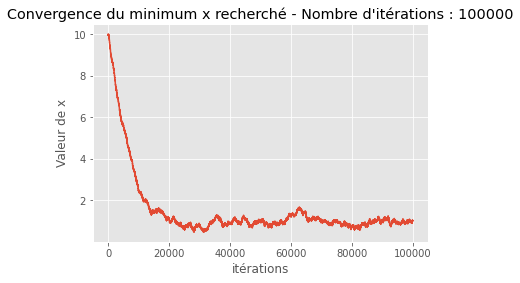

In [9]:
#Paramètres
N=100_000
T_min=0.0005
x0=10
T0=1

sa_impl = SimulatedAnnealingImplementation()
result = sa_impl.simulated_annealing(f=lambda x: (x - 1) ** 2, max_iter=N, min_temp=T_min, initial_state=x0, initial_temp=T0, draw_neighbour=sa_impl.draw_neighbour)
sa_impl.plot_annealing(result[0], step_number=N, draw_steps=True)


3\. Test your algorithm for $K = 50$ randomly located cities (i.e., generate the values of $(C_k)_{1 \leq k \leq K}$ randomly). Display both the evolution of the cost function with the iterations and the final route. Empirically tune the value $T_0$ to improve the result of the algorithm.

> *Notes*:
>
> a) for reproducibility, set the random seed of the random number generator to a specific value, *e.g.*, 0;
>
> b) to generate an initial path $x_0$, you can for instance randomly select a starting city $k$, and define the next city sequentially by taking its *nearest neighbour*;
>
> c) to display the trajectory, you can use `matplotlib.pyplot.arrow` to display an arrow between two consecutive points.

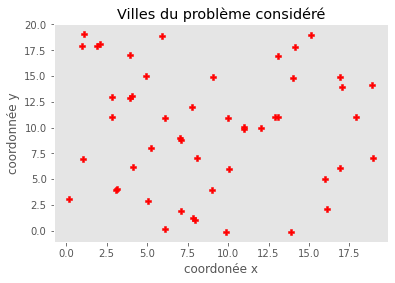

In [10]:
#paramèrtes
K = 50
max_size_city = 20
etalement = 1

#Simulation
grid= sa_impl.create_city(K,max_size_city,etalement)
sa_impl.plotTSP(grid=grid)

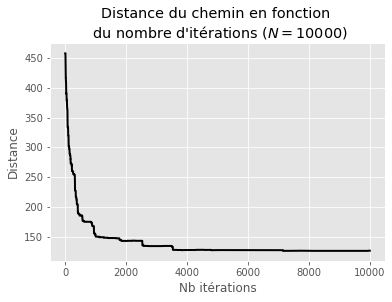

In [11]:
#Paramètres
N=10000
T_min=0.005
sigma = np.random.permutation(K)
x0 = sigma
T0 = 1
dist = lambda u,v : np.linalg.norm(u-v,2)
f=lambda x : sa_impl.distance_permut(x,dist,grid)

# Simulation
X_TSP,F_TSP = sa_impl.simulated_annealing(f,N,T_min,x0,T0,sa_impl.draw_neighbourTSP)
sa_impl.plot_distance_iter(F_TSP,N)


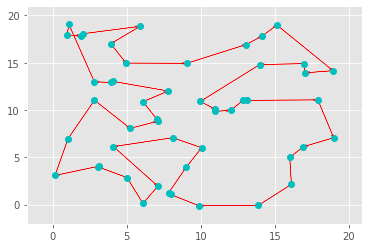

In [12]:
sa_impl.plotTSP_path([X_TSP[-1]], grid)

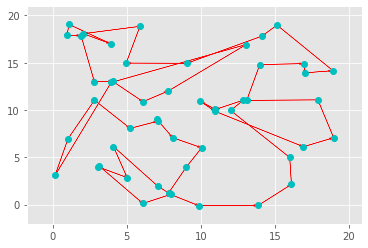

In [13]:
sa_impl.evolution_travelsaleman(X_TSP,grid,iter_display=100)